### Import necessary libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
# Read the Health App dataset
health_df = pd.read_csv("HealthApp_2k.log_structured.csv")
health_df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
...,...,...,...,...,...,...,...
1995,1996,20171224-0:58:53:985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1996,1997,20171224-0:59:7:581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,1998,20171224-1:0:0:794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,1999,20171224-1:1:0:935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


### Converting the time stamp into date time format and adding the date column for making further analysis easier

In [3]:
# Convert timestamp to datetime format
health_df['Time'] = pd.to_datetime(health_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
# Extract the date from the datetime and add it as a column
health_df['Date'] = health_df['Time'].dt.date

# Extract time from the dateitme and add it as a column
health_df['TimeHrsMin'] = health_df['Time'].dt.time

health_df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,TimeHrsMin
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22:15:29.606000
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22:15:29.615000
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22:15:29.633000
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22:15:29.635000
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22:15:29.635000
...,...,...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,00:58:53.985000
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,00:59:07.581000
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,01:00:00.794000
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,01:01:00.935000


### Daily Steps of the user
The getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*> event template has five components and assumed that the first one represent time in unix format and the 2nd one after occurence of first "##" represents the steps captured at that particular time. Rest of the fthree represent other values may be values in different time intervals.

In [77]:
def get_daily_step_values(df, timestamp_column='Time', content_column='Content'):
    """
    Get the current daily step value for each day in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame containing timestamp and content columns.
    - timestamp_column: str
        The name of the timestamp column by default 'Time'.
    - content_column: str
        The name of the content column by default 'Content'.

    Returns:
    - daily_step_values : Series
        daily_step_values - A DataFrame with Date and DailySteps columns representing the current daily step value for each day.
    - daily_range_step_values : DataFrame
        daily_range_step_values - A DataFrame with Date, DailySteps and TimeHrsMin columns representing the list of steps and associated time for each day.
    """

    # Function to extract daily steps from 'getTodayTotalDetailSteps' events
    def extract_daily_steps(content):
        if 'getTodayTotalDetailSteps' in content:
            components = content.split('=')[1].split('##')
            return int(components[1])  # Assuming the total steps are in the second component
        else:
            return None        

    # Apply the function to create a 'DailySteps' column
    df['DailySteps'] = df[content_column].apply(extract_daily_steps)

    # Rows without null values
    daily_steps_df = df[df['DailySteps'].notna()]

    # Selecting only the last value for total steps walked in a day : 1st return value
    daily_step_values = daily_steps_df.groupby('Date')['DailySteps'].last()

    # For getting the list of steps per day : 2nd return value
    daily_range_step_values = daily_steps_df.groupby('Date')['DailySteps'].apply(list).reset_index() 
    
     # Selecting those rows only which are having the 'getTodayTotalDetailSteps'
    event_rows = df[df['Content'].str.contains('getTodayTotalDetailSteps')]
    # Group times by date
    event_times = event_rows.groupby('Date')['TimeHrsMin'].apply(list).reset_index()
    # Adding the event_times in the daily_range_step_values
    daily_range_step_values['TimeHrsMin'] = event_times['TimeHrsMin']

    # Rectifying the first two values of previous day but are present in the new day data
    daily_range_step_values['DailySteps'][1][0] = 0.0
    daily_range_step_values['DailySteps'][1][1] = 0.0

    return daily_step_values, daily_range_step_values

# Get the current daily step values
daily_step_values, daily_range_step_values = get_daily_step_values(health_df)

# Display the result
print("Current Daily Step Values:")
print(daily_step_values)
print(end = '\n')
print("Range of Daily Step Values:")
print(daily_range_step_values)

Current Daily Step Values:
Date
2017-12-23    7214.0
2017-12-24       0.0
Name: DailySteps, dtype: float64

Range of Daily Step Values:
         Date                                         DailySteps  \
0  2017-12-23  [6993.0, 7007.0, 7008.0, 7009.0, 7011.0, 7012....   
1  2017-12-24  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          TimeHrsMin  
0  [22:15:29.635000, 22:15:29.950000, 22:15:30.63...  
1  [00:00:00.233000, 00:00:00.234000, 00:00:00.62...  


#### Visualisation of Daily Steps

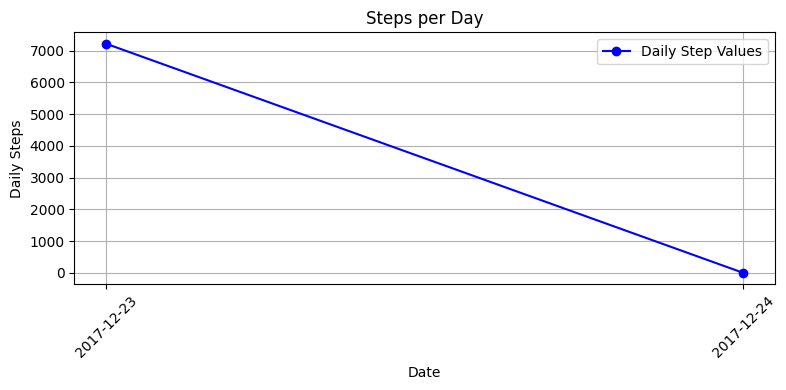

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(daily_step_values.index, daily_step_values.values, marker='o', linestyle='-', color='b', label='Daily Step Values')
plt.title('Steps per Day')
plt.xlabel('Date')
plt.ylabel('Daily Steps')

# For removing redundant values from the x ticks
plt.xticks(daily_step_values.index.unique(), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#### Plotting day wise steps

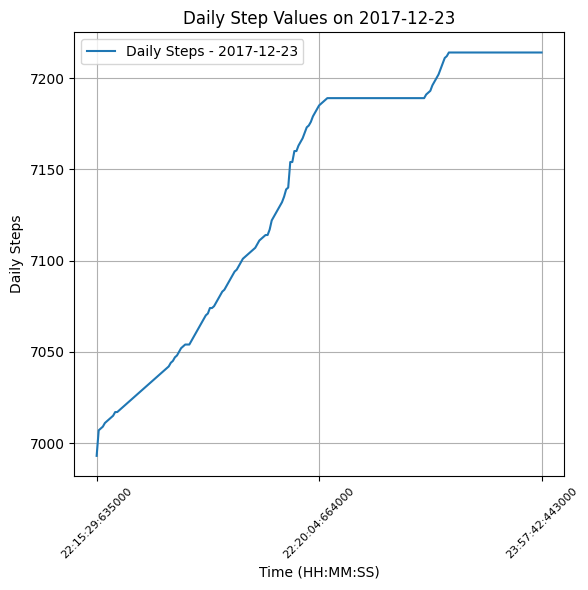

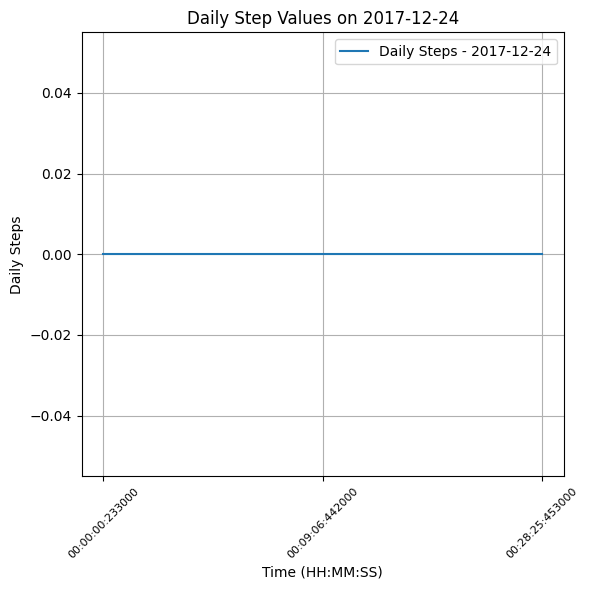

In [79]:
#Converting the TimeHrsMin into string for proper plotting
for i in range(0, len(daily_range_step_values['TimeHrsMin'])):
    for j in range(0, len(daily_range_step_values['TimeHrsMin'][i])):
        daily_range_step_values['TimeHrsMin'][i][j] = daily_range_step_values['TimeHrsMin'][i][j].strftime('%H:%M:%S:%f')

# Plot daily step values for each day
for index, row in daily_range_step_values.iterrows():
    date = row['Date']
    daily_steps = row['DailySteps']
    time_hrs_min = row['TimeHrsMin']

    plt.figure(figsize=(6, 6))
    plt.plot(time_hrs_min, daily_steps, linestyle='-', label=f'Daily Steps - {date}')
    plt.title(f'Daily Step Values on {date}')
    plt.xlabel('Time (HH:MM:SS)')
    plt.ylabel('Daily Steps')
    
    # Only adding the 1st, mid and last values in the x-ticks
    plt.xticks([time_hrs_min[0], time_hrs_min[int(len(time_hrs_min)/2)], time_hrs_min[len(time_hrs_min)-1]],rotation=45, fontsize = 8)
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

### Find the workout session per day
Assumed that "onStandStepChanged <*>" event template represents the workout session

In [63]:
def find_workout_sessions_per_day(df, timestamp_column='Time', event_column='EventTemplate'):
    """
    Find workout sessions per day based on a specific event template in this case onStandStepChanged <*>.

    Parameters:
    - df: DataFrame
        The input DataFrame containing timestamp and event columns.
    - timestamp_column: str
        The name of the timestamp column by default 'Time'.
    - event_column: str
        The name of the event column by default 'EventTemplate'.

    Returns:
    - workout_sessions_per_day: DataFrame
        A DataFrame with Date and WorkoutSessions columns representing workout sessions per day.
    """

    # Define criteria for identifying workout sessions (example: onStandStepChanged event)
    workout_sessions_df = df[df[event_column] == 'onStandStepChanged <*>']

    # Group by date and count the number of workout sessions per day
    workout_sessions_per_day = workout_sessions_df.groupby('Date').size().reset_index(name='WorkoutSessions')

    return workout_sessions_per_day

# Find workout sessions per day
workout_sessions_per_day = find_workout_sessions_per_day(health_df)

# Display the result
print("Workout Sessions per Day:")
print(workout_sessions_per_day)

Workout Sessions per Day:
         Date  WorkoutSessions
0  2017-12-23              236
1  2017-12-24               24


#### Visualisation of workout sessions per day

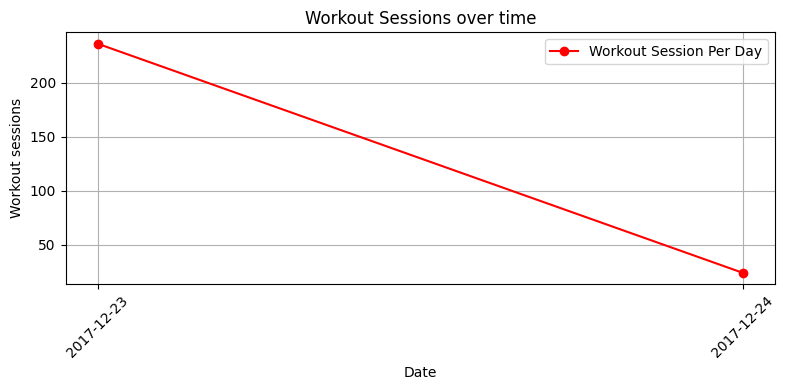

In [74]:
plt.figure(figsize=(8, 4))
plt.plot(workout_sessions_per_day['Date'], workout_sessions_per_day['WorkoutSessions'], marker='o', linestyle='-', color='r', label='Workout Session Per Day')
plt.title('Workout Sessions over time')
plt.xlabel('Date')
plt.ylabel('Workout sessions')

# For removing redundant values from the x-ticks
plt.xticks(daily_step_values.index.unique(), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Find daily active time

In [66]:
def find_daily_active_time(df, timestamp_column='Time'):
    """
    Find daily active time based on a timestamp column in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame containing the timestamp column.
    - timestamp_column: str
        The name of the timestamp column by default in this case as "Time".

    Returns:
    - daily_active_time: Series
        A Series representing the total active time for each day.
    """
    df['Minute'] = df[timestamp_column].dt.hour * 60 + df[timestamp_column].dt.minute
    
    # Group by date and calculate total active time for each day
    daily_active_time = df.groupby('Date')['Minute'].nunique()
    
    return daily_active_time

# Find daily active time
user_daily_active_time = find_daily_active_time(health_df)

# Display the result
print("User Daily Active Time (in Minutes):")
print(user_daily_active_time)

User Daily Active Time (in Minutes):
Date
2017-12-23    98
2017-12-24    47
Name: Minute, dtype: int64


#### Visualisation of daily active time

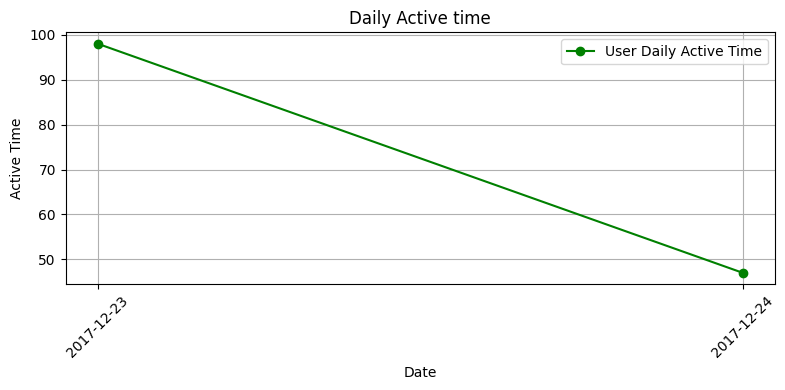

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(user_daily_active_time.index, user_daily_active_time.values, marker='o', linestyle='-', color='g', label='User Daily Active Time')
plt.title('Daily Active time')
plt.xlabel('Date')
plt.ylabel('Active Time')

# for removing redundant values from the x-ticks
plt.xticks(daily_step_values.index.unique(), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Daily calories burnt

In [49]:
def calculate_daily_calories_burnt(df, timestamp_column='Time', content_column='Content'):
    """
    Calculate calories burnt at the end of the day and display the data day-wise.

    Parameters:
    - df: DataFrame
        The input DataFrame containing timestamp and content columns.
    - timestamp_column: str
        The name of the timestamp column in this case by default as 'Time'.
    - content_column: str
        The name of the content column in this case by default as 'Content'.

    Returns:
    - daily_calories_burnt: DataFrame
        A DataFrame with Date and CaloriesBurnt columns representing the last calorie burnt value for each day (in kcal).
    """
    
    # Function to extract last calorie burnt value
    def extract_last_calories_burnt(content):
        if 'calculateCaloriesWithCache' in content:
            components = content.split('=')
            return float(components[-1])  # Assuming the last component is the calorie burnt value
        else:
            return None

    # Apply the function to create a 'CaloriesBurnt' column
    df['CaloriesBurnt'] = df[content_column].apply(extract_last_calories_burnt)

    # Selecting rows without null values
    calories_burnt_df = df[df['CaloriesBurnt'].notna()]

    # Group by date for the last value of calorieburnt for each day
    daily_calories_burnt = calories_burnt_df.groupby('Date')['CaloriesBurnt'].last()

    #for kcal - kilo per calories
    daily_calories_burnt = daily_calories_burnt.to_frame().reset_index()
    daily_calories_burnt['CaloriesBurnt'] = daily_calories_burnt['CaloriesBurnt']/1000.0

    return daily_calories_burnt

# Calculate daily calories burnt
user_daily_calories_burnt = calculate_daily_calories_burnt(health_df)

# Display the result
print("Daily Calories Burnt:")
print(user_daily_calories_burnt)

Daily Calories Burnt:
         Date  CaloriesBurnt
0  2017-12-23        131.208
1  2017-12-24          0.000


#### Visualisation of Calories Burnt Per day

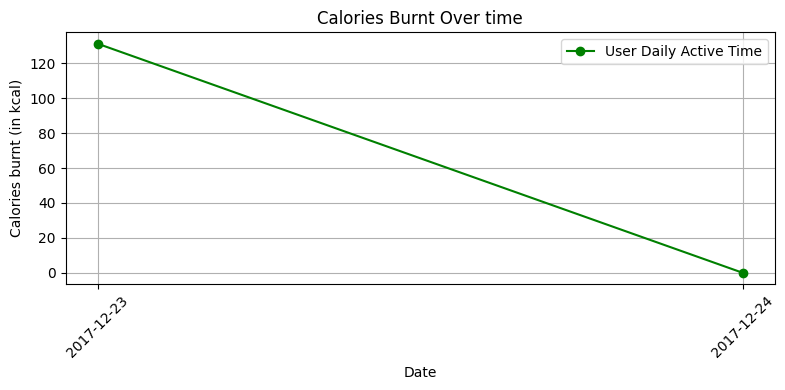

In [69]:
plt.figure(figsize=(8, 4))
plt.plot(user_daily_calories_burnt['Date'], user_daily_calories_burnt['CaloriesBurnt'], marker='o', linestyle='-', color='g', label='User Daily Active Time')
plt.title('Calories Burnt Over time')
plt.xlabel('Date')
plt.ylabel('Calories burnt (in kcal)')

#for removing redundant values from the x ticks
plt.xticks(user_daily_calories_burnt['Date'].unique(), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Altitude value per day
Altitude or elevation is the sea level of the user

In [68]:
def find_altitude_values_per_day(df, timestamp_column='Time', content_column='Content'):
    """
    Find altitude values per day using 'calculateAltitudeWithCache' event template.

    Parameters:
    - df: DataFrame
        The input DataFrame containing timestamp and content columns.
    - timestamp_column: str
        The name of the timestamp column in this case by default 'Time'.
    - content_column: str
        The name of the content column in this case by default 'Content'.

    Returns:
    - altitude_values_per_day: DataFrame
        A DataFrame with Date and AltitudeValues columns representing list of altitude values per day.
    """

    def extract_altitude_values(content):
        if 'calculateAltitudeWithCache' in content:
            components = content.split('=')
            return float(components[-1])  # Assuming the last component is the altitude value
        else:
            return None
        
    # Apply the function to extract altitude values
    df['AltitudeValues'] = df[content_column].apply(extract_altitude_values)

    # Selecting only the not null rows
    altitude_values_df = df[df['AltitudeValues'].notna()]

    # Grouping by date and applying list function to get the list
    altitude_values_per_day = altitude_values_df.groupby('Date')['AltitudeValues'].apply(list).reset_index()

    return altitude_values_per_day

# Find altitude values per day
altitude_values_per_day = find_altitude_values_per_day(health_df)

# Display the result
print("Altitude Values per Day:")
print(altitude_values_per_day)

Altitude Values per Day:
         Date                                     AltitudeValues
0  2017-12-23  [240.0, 240.0, 240.0, 240.0, 240.0, 240.0, 240...
1  2017-12-24  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


#### Visualisation of Altitude per day
 In this case their are only two values 240 on 23rd and 0 on 24th. So thier will be no significant understanding from the graph but for other cases it will be useful.

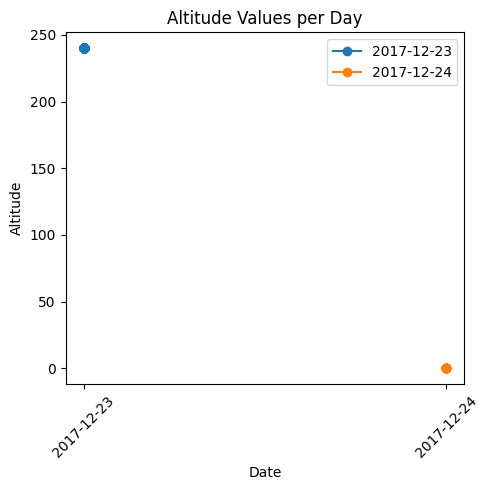

In [73]:
plt.figure(figsize=(5, 5))

for index, row in altitude_values_per_day.iterrows():
    date = row['Date']
    altitude_values = row['AltitudeValues']
    plt.plot([date] * len(altitude_values), altitude_values, marker='o', label=str(date))

plt.title('Altitude Values per Day')
plt.xlabel('Date')
plt.ylabel('Altitude')

#for removing redundant values from the x ticks
plt.xticks(user_daily_calories_burnt['Date'].unique(), rotation=45)

plt.legend()
plt.tight_layout()

plt.show()